[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/biased_random_walk.ipynb)

In [0]:
class Location(object):
  def __init__(self, x, y):
    self.x, self.y = x, y
  def move(self, deltaX, deltaY):
    return Location(self.x + deltaX, self.y + deltaY)
  def getX(self):
    return self.x
  def getY(self):
    return self.y
  def distFrom(self, other):
    ox, oy = other.x, other.y
    xDist, yDist = self.x - ox, self.y - oy
    return(xDist**2 + yDist**2)**0.5
  def __str__(self):
    return '<' + str(self.x) + ', ' + str(self.y) + '>'
  
class Field(object):
  def __init__(self):
    self.drunks = {}
  def addDrunk(self, drunk, loc):
    if drunk in self.drunks:
      raise ValueError('Duplicate drunk')
    else:
      self.drunks[drunk] = loc
  def moveDrunk(self, drunk):
    if drunk not in self.drunks:
      raise ValueError('Drunk not in field')
    xDist, yDist = drunk.takeStep()
    currentLocation = self.drunks[drunk]
    self.drunks[drunk] = currentLocation.move(xDist, yDist)
  def getLoc(self, drunk):
    if drunk not in self.drunks:
      raise ValueError('Drunk not in field')
    return self.drunks[drunk]  

In [0]:
import random

class Drunk(object):
  def __init__(self, name=None):
    self.name = name
  def __str__(self):
    if self != None:
      return self.name
    return 'Anonymous'
class UsualDrunk(Drunk):
  def takeStep(self):
    stepChoices = [(0,1),(0,-1),(1,0),(-1,0)]
    return random.choice(stepChoices)
    return random.choice(stepChoices)

In [0]:
def walk(f, d, numSteps):
  start = f.getLoc(d)
  for i in range(numSteps):
    f.moveDrunk(d)
  return start.distFrom(f.getLoc(d))

def simWalks(numSteps, numTrials, dClass):
  Homer = dClass()
  origin = Location(0,0)
  distances = []
  for t in range(numTrials):
    f = Field()
    f.addDrunk(Homer, origin)
    distances.append(round(walk(f, Homer, numSteps), 1))
  return distances

def drunkTest(walkLengths, numTrials, dClass):
  for numSteps in walkLengths:
    distances = simWalks(numSteps, numTrials, dClass)
    print(dClass.__name__, 'random of', numSteps, 'steps')
    print(' Mean =', round(sum(distances)/len(distances), 4))
    print(' Max =', max(distances), 'Min =', min(distances))

In [0]:
class ColdDrunk(Drunk):
  def takeStep(self):
    stepChoices = [(0.0,1.0),(0.0,-2.0),(1.0,0.0),(-1.0,0.0)]
    return random.choice(stepChoices)
class EWDrunk(Drunk):
  def takeStep(self):
    stepChoices = [(1.0,0.0),(-1.0,0.0)]
    return random.choice(stepChoices)
def simAll(drunkKinds, walkLengths, numTrials):
  for dClass in drunkKinds:
    drunkTest(walkLengths, numTrials, dClass)

In [12]:
simAll((UsualDrunk, ColdDrunk, EWDrunk),(100,1000),10)

UsualDrunk random of 100 steps
 Mean = 9.5
 Max = 23.4 Min = 1.4
UsualDrunk random of 1000 steps
 Mean = 22.87
 Max = 49.4 Min = 6.0
ColdDrunk random of 100 steps
 Mean = 27.75
 Max = 57.6 Min = 14.0
ColdDrunk random of 1000 steps
 Mean = 253.76
 Max = 333.5 Min = 200.6
EWDrunk random of 100 steps
 Mean = 11.4
 Max = 18.0 Min = 4.0
EWDrunk random of 1000 steps
 Mean = 23.8
 Max = 38.0 Min = 4.0


In [0]:
class styleIterator(object):
  def __init__(self, styles):
    self.index = 0
    self.styles = styles
  def nextStyle(self):
    result = self.styles[self.index]
    if self.index == len(self.styles)-1:
      self.index = 0
    else:
      self.index += 1
    return result  

Starting simulations of UsualDrunk
Starting simulation of 10 steps 
Starting simulation of 100 steps 
Starting simulation of 1000 steps 
Starting simulation of 10000 steps 
Starting simulation of 100000 steps 
Starting simulations of ColdDrunk
Starting simulation of 10 steps 
Starting simulation of 100 steps 
Starting simulation of 1000 steps 
Starting simulation of 10000 steps 
Starting simulation of 100000 steps 
Starting simulations of EWDrunk
Starting simulation of 10 steps 
Starting simulation of 100 steps 
Starting simulation of 1000 steps 
Starting simulation of 10000 steps 
Starting simulation of 100000 steps 


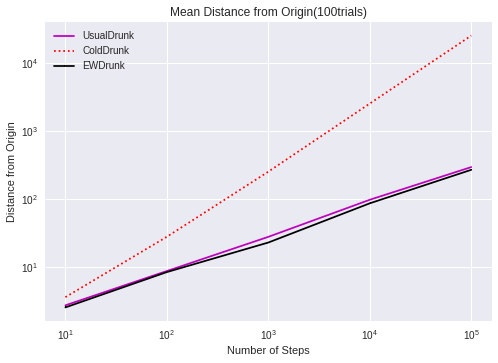

In [18]:
import pylab
def simDrunk(numTrials, dClass, walkLengths):
  meanDistances = []
  for numSteps in walkLengths:
    print('Starting simulation of', numSteps, 'steps ')
    trials = simWalks(numSteps, numTrials, dClass)
    mean = sum(trials)/len(trials)
    meanDistances.append(mean)
  return meanDistances
def simAll(drunkKinds, walkLengths, numTrials):
  styleChoice = styleIterator(('m-', 'r:', 'k-,'))
  for dClass in drunkKinds:
    curStyle = styleChoice.nextStyle()
    print('Starting simulations of' , dClass.__name__)
    means = simDrunk(numTrials, dClass, walkLengths)
    pylab.plot(walkLengths, means, curStyle, label=dClass.__name__)
    pylab.title('Mean Distance from Origin('+str(numTrials)+'trials)')
    pylab.xlabel('Number of Steps')
    pylab.ylabel('Distance from Origin')
    pylab.legend(loc = 'best')
    pylab.semilogx()
    pylab.semilogy()
simAll((UsualDrunk, ColdDrunk, EWDrunk),(10,100,1000,10000,100000),100)    

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:638: UserWarning: Unrecognized location " lower left ". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


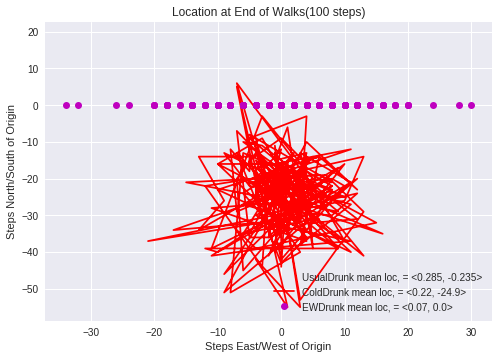

In [22]:
def getFinalLocs(numSteps, numTrials, dClass):
  locs = []
  d = dClass()
  for t in range(numTrials):
    f = Field()
    f.addDrunk(d, Location(0,0))
    for s in range(numSteps):
      f.moveDrunk(d)
    locs.append(f.getLoc(d))
  return locs
def plotLocs(drunkKinds, numSteps, numTrials):
  styleChoice = styleIterator(('k+', 'r', 'mo'))
  for dClass in drunkKinds:
    locs = getFinalLocs(numSteps, numTrials, dClass)
    xVals, yVals =[],[]
    for loc in locs:
      xVals.append(loc.getX())
      yVals.append(loc.getY())
    meanX = sum(xVals)/len(xVals)
    meanY = sum(yVals)/len(yVals)
    curStyle = styleChoice.nextStyle()
    pylab.plot(xVals, yVals, curStyle, label = dClass.__name__ + ' mean loc, = <' + str(meanX) + ', ' + str(meanY) + '>')
  pylab.title('Location at End of Walks(' + str(numSteps) + ' steps)')
  pylab.xlabel('Steps East/West of Origin')
  pylab.ylabel('Steps North/South of Origin')
  pylab.legend(loc = ' lower left ')

plotLocs((UsualDrunk, ColdDrunk, EWDrunk),100, 200)  